In [9]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [10]:
df = pd.read_csv("sim_data_full.csv")
df["drug_duration"] = "short"
df["drug_duration"].loc[df["drug_type"]=="DP"] = "long"

df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
# df_pfpr = df[df["baseline_transmission_metric"]=="eir"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

df_eir = df[df["baseline_transmission_metric"]=="eir"].reset_index(drop=True)

c:\users\joshsu\venv\dev\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
south_central_scenarios_to_plot = [1,56,57,
                                   4,58,59,
                                   13,34,35,
                                   16,60,61]
df1 = df_pfpr[np.logical_and(np.in1d(df_pfpr["archetype"], ["Central", "Southern"]),
                             np.in1d(df_pfpr["scenario_number"], south_central_scenarios_to_plot))].reset_index(drop=True)

sahel_scenarios_to_plot = [1,64,65,
                           4,66,67,
                           13,44,43, # note: Sahel scenarios are opposite order of ivermectin/primaquine
                           16,68,69]
df2 = df_pfpr[np.logical_and(df_pfpr["archetype"]=="Sahel",
                             np.in1d(df_pfpr["scenario_number"], sahel_scenarios_to_plot))].reset_index(drop=True)

df_plot = pd.concat([df1,df2], ignore_index=True)

# df_pfpr = df_pfpr[np.in1d(df_pfpr["scenario_number"], scenarios_to_plot)].reset_index(drop=True)


meta NOT subset; don't know how to subset; dropped


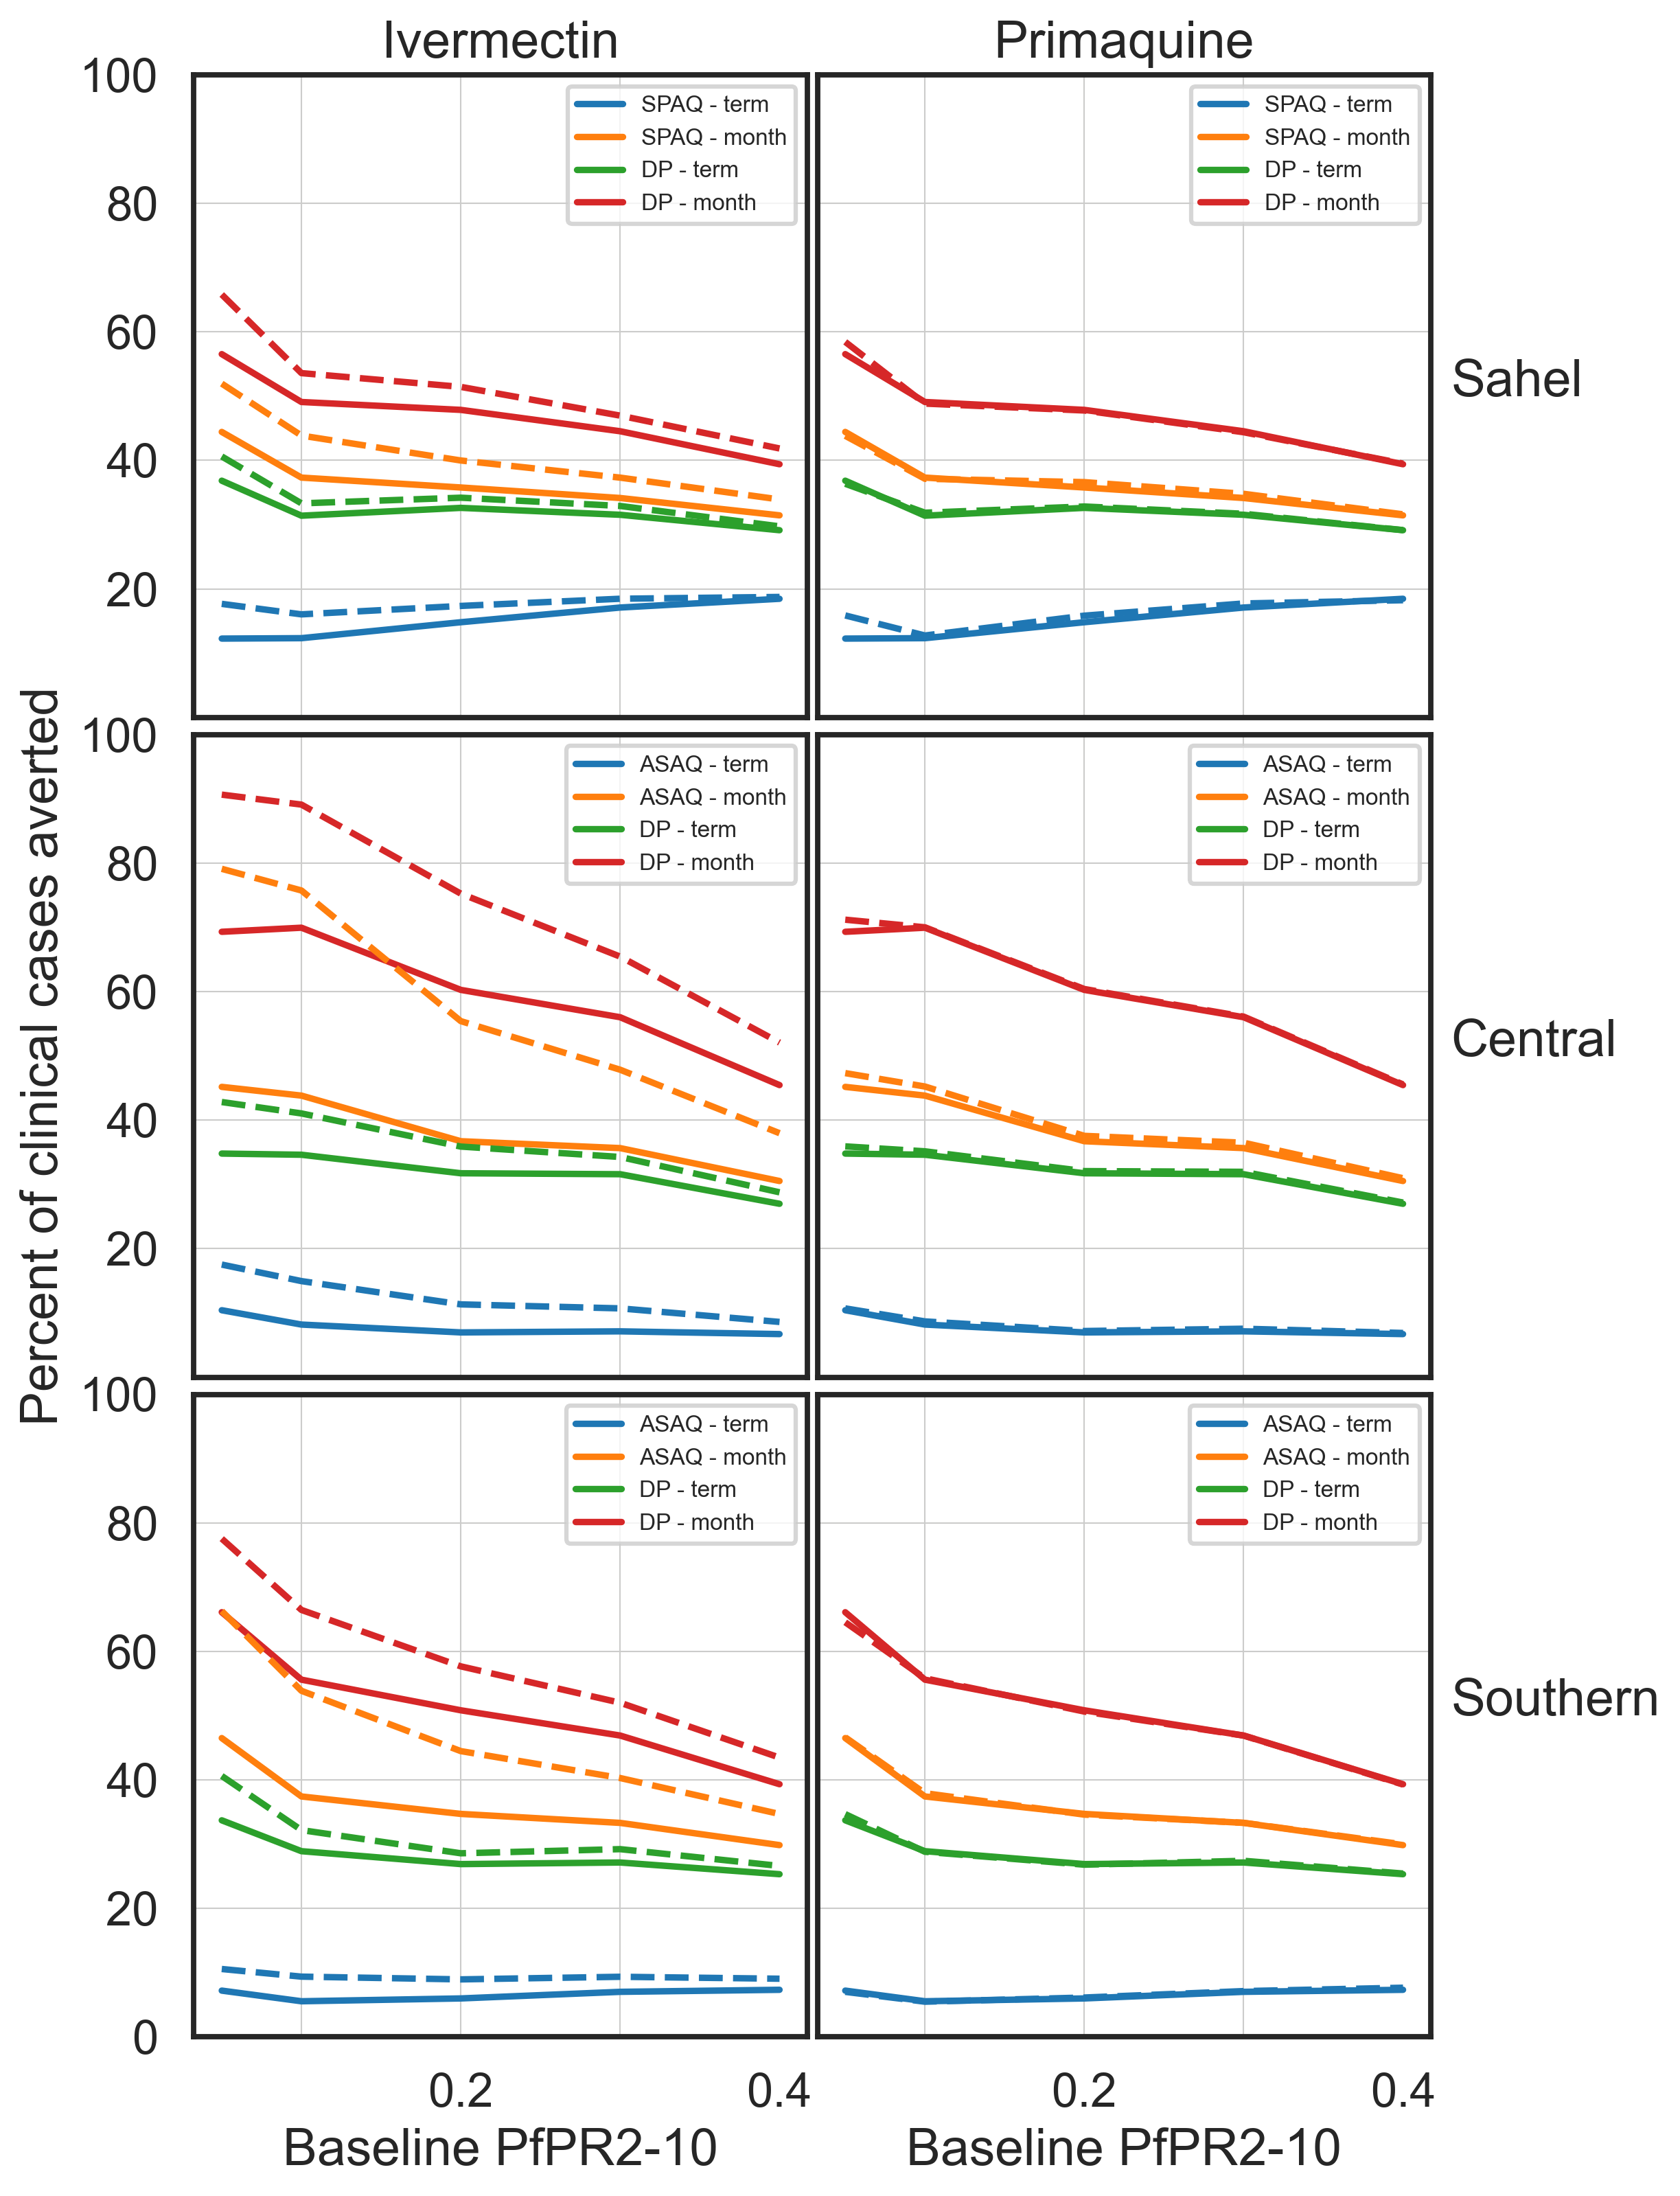

In [12]:

df_singleplot = df_plot.copy()
drug_types = ["ASAQ", "SPAQ", "DP"]
df_singleplot["drug_type"] = pd.Categorical(df_singleplot["drug_type"], drug_types, ordered=True)

df_singleplot["Extra drugs"] = ""
df_singleplot.loc[np.logical_and(df_singleplot["ivermectin"]==False, 
                                                df_singleplot["primaquine"]==False), "Extra drugs"] = "None"
df_singleplot.loc[np.logical_and(df_singleplot["ivermectin"]==True, 
                                                df_singleplot["primaquine"]==False), "Extra drugs"] = "Ivermectin"
df_singleplot.loc[np.logical_and(df_singleplot["ivermectin"]==False, 
                                                df_singleplot["primaquine"]==True), "Extra drugs"] = "Primaquine"

archetypes = ["Sahel", "Central", "Southern"]
df_singleplot["archetype"] = pd.Categorical(df_singleplot["archetype"], categories = archetypes, ordered=True)

plt.figure(dpi=300, figsize=(8.5,11))


# ==================================================================================
# Sahel:
sdf = df_singleplot[df_singleplot["archetype"]=="Sahel"]
label_dict = {1: "SPAQ - term",
                     4: "SPAQ - month",
                     13: "DP - term",
                     16: "DP - month"}
    
color_dict = {
    1: "C0", 
    4: "C1",
    13: "C2", 
    16: "C3",
    64: "C0",
    65: "C0",
    66: "C1",
    67: "C1",
    44: "C2",
    43: "C2",
    68: "C3",
    69: "C3"
}

iver_plot_scenarios = [1,4,13,16,64,66,44,68]
prim_plot_scenarios = [1,4,13,16,65,67,43,69]


for i in range(1,3):
    plt.subplot(3,2,i)
    if i == 1:
        select_scenarios = iver_plot_scenarios
    else:
        select_scenarios = prim_plot_scenarios
        
        
    for s, ssdf in sdf.groupby("scenario_number"):
        if s in select_scenarios:
            if s in label_dict:
                label = label_dict[s]
                ls = "solid"
            else:
                label = None
                ls = "dashed"
            plt.plot(ssdf["transmission_level"], 100*ssdf["frac_averted_clinical__all"], 
                     c=color_dict[s], label=label, ls = ls)
    plt.legend(fontsize=8)
    
    if i == 1:
        plt.title("Ivermectin")
    else:
        plt.title("Primaquine")
        
    if i == 2:
        plt.text(0.43,50,"Sahel")
        
    plt.ylim([0,100])
    plt.xticks([])
    if i == 1:
        plt.yticks([20,40,60,80,100])
    else:
        plt.yticks([])
        
    plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)

    plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
    

# ==================================================================================
# CENTRAL:
# [1,56,57,
   # 4,58,59,
   # 13,34,35,
   # 16,60,61]
sdf = df_singleplot[df_singleplot["archetype"]=="Central"]
label_dict = {1: "ASAQ - term",
              4: "ASAQ - month",
              13: "DP - term",
              16: "DP - month"}
    
color_dict = {
    1: "C0", 
    4: "C1",
    13: "C2", 
    16: "C3",
    56: "C0",
    57: "C0",
    58: "C1",
    59: "C1",
    34: "C2",
    35: "C2",
    60: "C3",
    61: "C3"
}

iver_plot_scenarios = [1,4,13,16,56,58,34,60]
prim_plot_scenarios = [1,4,13,16,57,59,35,61]


for i in range(1,3):
    plt.subplot(3,2,i+2)
    if i == 1:
        select_scenarios = iver_plot_scenarios
    else:
        select_scenarios = prim_plot_scenarios
        
        
    for s, ssdf in sdf.groupby("scenario_number"):
        if s in select_scenarios:
            if s in label_dict:
                label = label_dict[s]
                ls = "solid"
            else:
                label = None
                ls = "dashed"
            plt.plot(ssdf["transmission_level"], 100*ssdf["frac_averted_clinical__all"], 
                     c=color_dict[s], label=label, ls = ls)
    plt.legend(fontsize=8)
    
        
    if i == 2:
        plt.text(0.43,50,"Central")
    if i == 1:
        plt.ylabel("Percent of clinical cases averted")
        
    plt.ylim([0,100])
    plt.xticks([])
    if i == 1:
        plt.yticks([20,40,60,80,100])
    else:
        plt.yticks([])
    
    plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)

    plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)

    
    
# ==================================================================================
sdf = df_singleplot[df_singleplot["archetype"]=="Southern"]

for i in range(1,3):
    plt.subplot(3,2,i+4)
    if i == 1:
        select_scenarios = iver_plot_scenarios
    else:
        select_scenarios = prim_plot_scenarios
        
        
    for s, ssdf in sdf.groupby("scenario_number"):
        if s in select_scenarios:
            if s in label_dict:
                label = label_dict[s]
                ls = "solid"
            else:
                label = None
                ls = "dashed"
            plt.plot(ssdf["transmission_level"], 100*ssdf["frac_averted_clinical__all"], 
                     c=color_dict[s], label=label, ls = ls)
    plt.legend(fontsize=8)
    
        
    if i == 2:
        plt.text(0.43,50,"Southern")
        
    plt.xlabel("Baseline PfPR2-10")
    plt.ylim([0,100])
    if i == 2:
        plt.yticks([])
    if i == 0:
        plt.xticks([0,0.2,0.4])
    else:
        plt.xticks([0.2,0.4])
    
    plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)

    plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
    
plt.tight_layout(w_pad=0.1,h_pad=0)
plt.savefig("transmission_target.pdf")
plt.savefig("transmission_target.png")

In [13]:
i

2

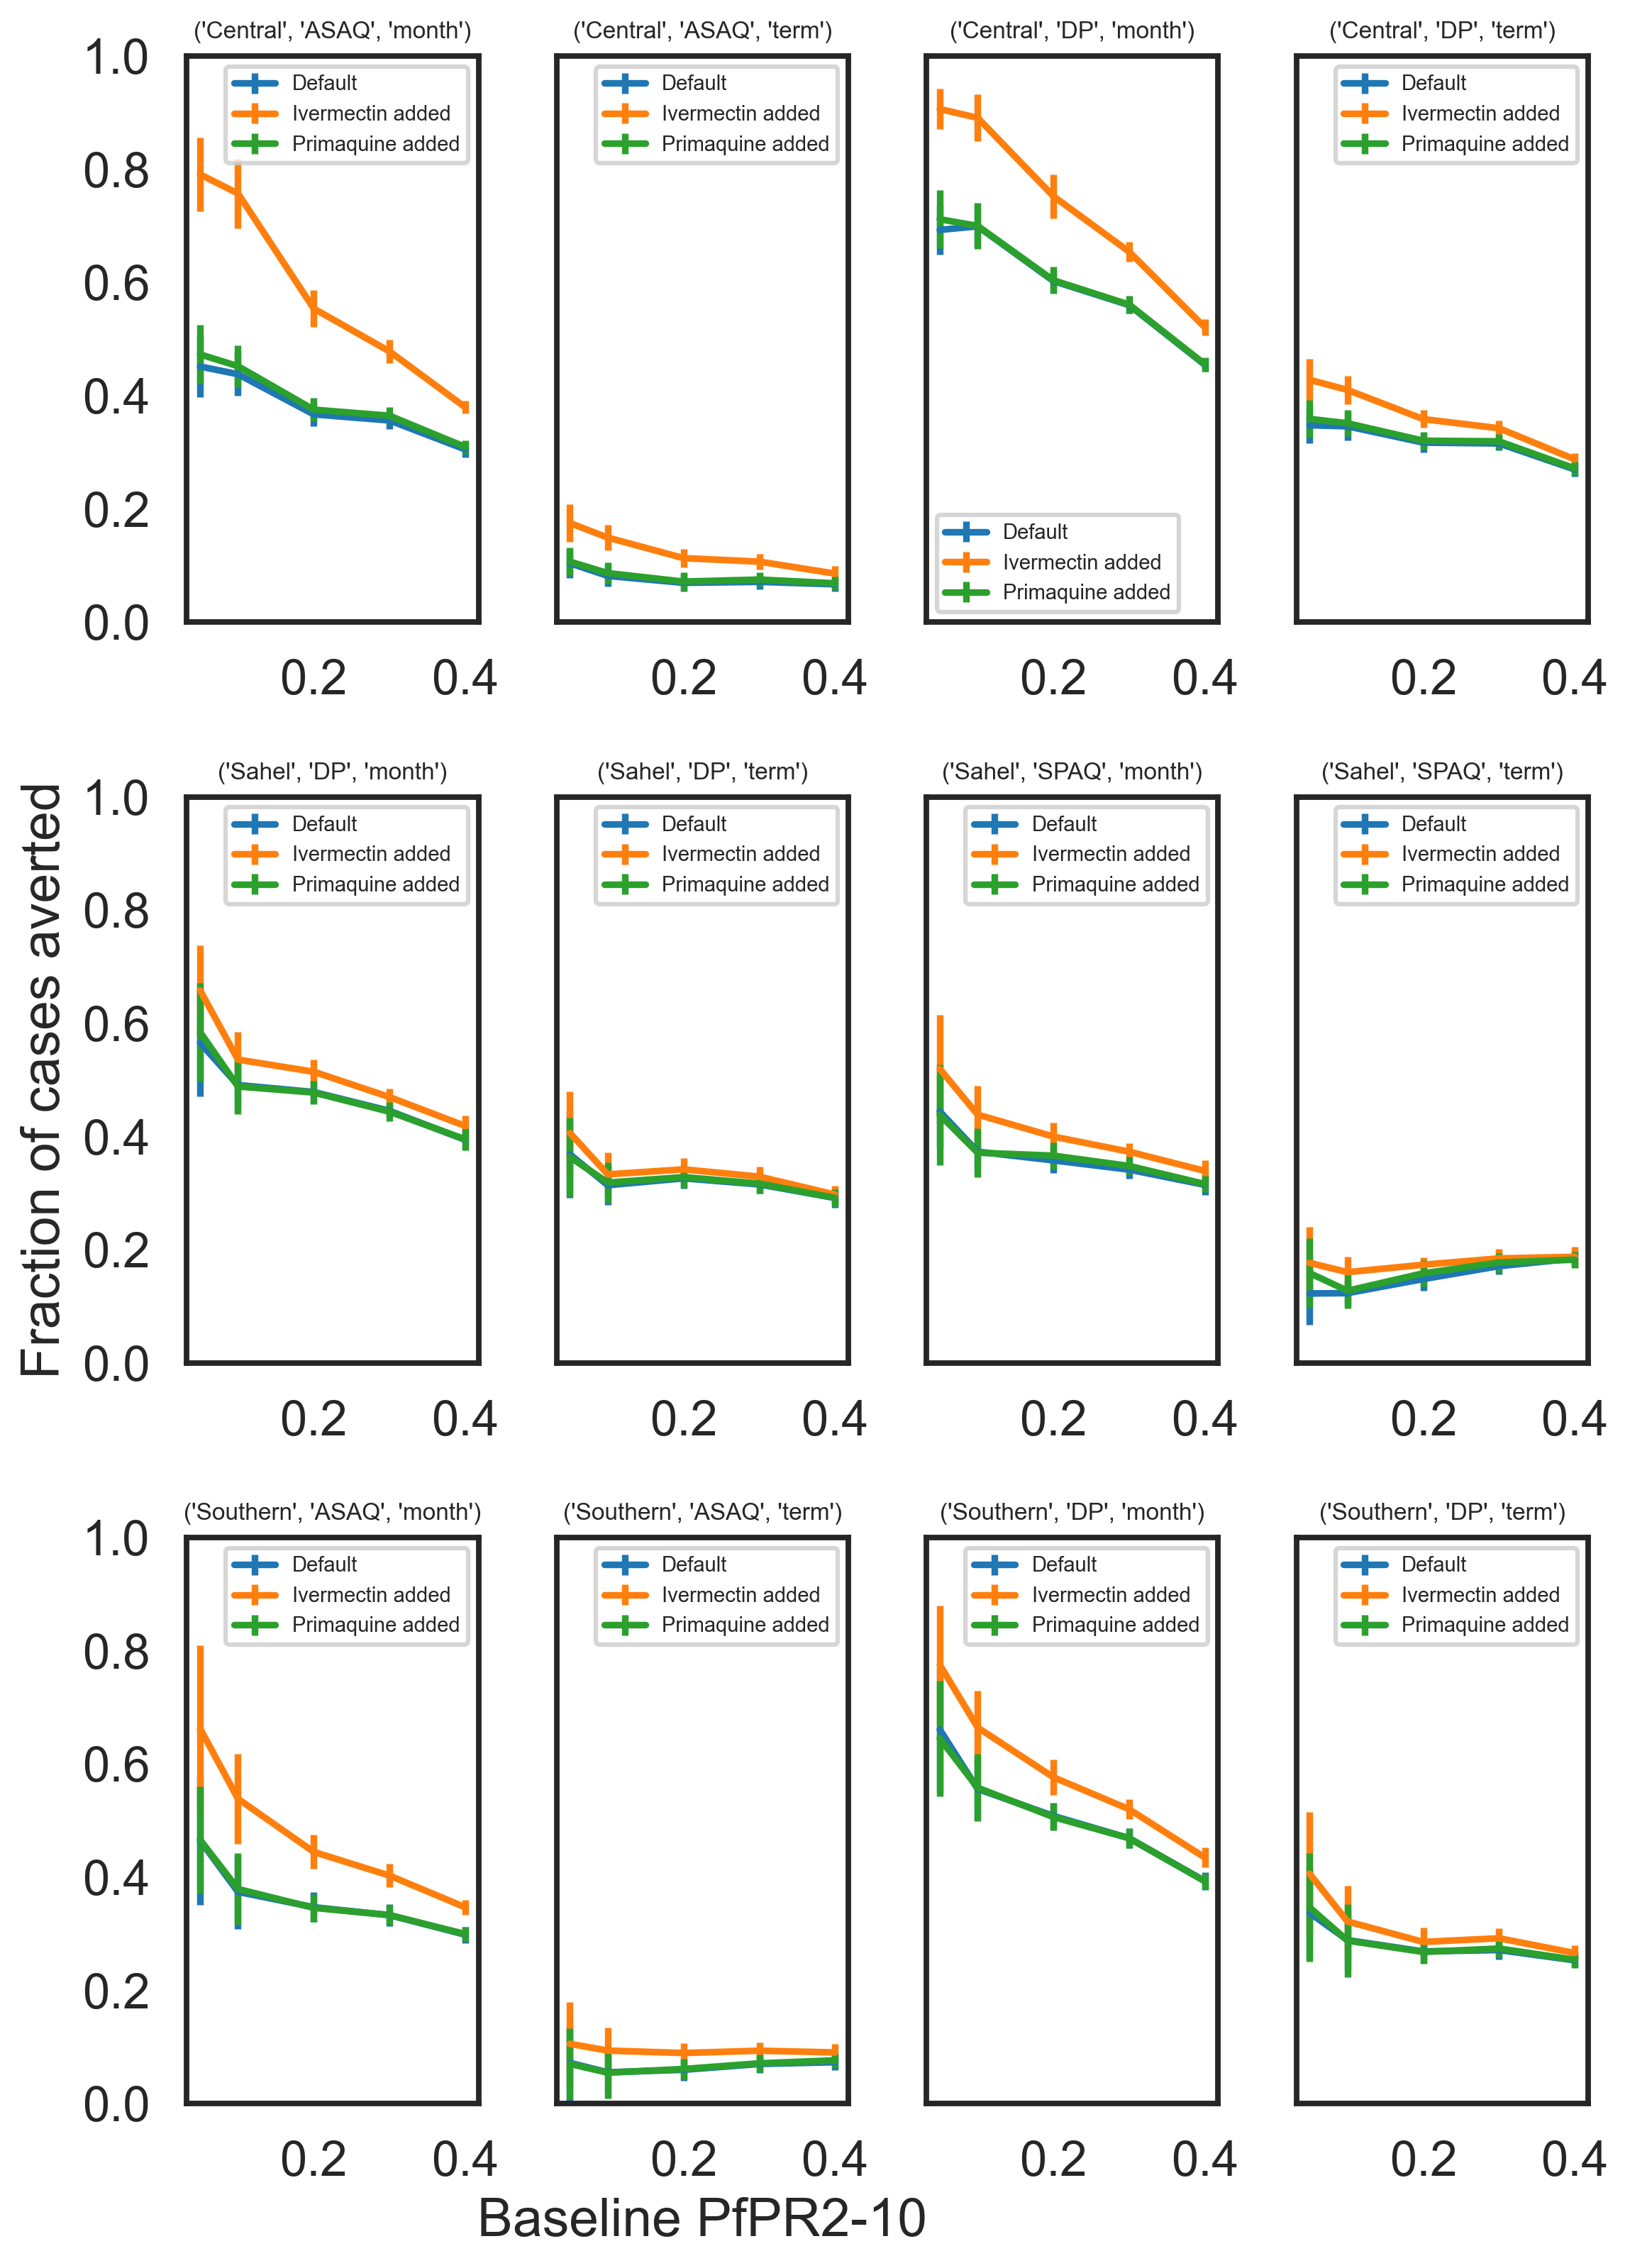

In [14]:
# h = df_pfpr[df_pfpr["archetype"]=="Southern"]
i = 1
plt.figure(dpi=300, figsize=(8,11))
for ii, sdf in df_plot.groupby(["archetype", "drug_type", "interval"]):
    

    regular = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==False)]
    iver = sdf[np.logical_and(sdf["ivermectin"]==True, sdf["primaquine"]==False)]
    prim = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==True)]
    
    plt.subplot(3,4,i)
    plt.errorbar(regular["transmission_level"], regular["frac_averted_clinical__all"], yerr=regular["frac_averted_clinical__all_STDEV"], label="Default")
    plt.errorbar(iver["transmission_level"], iver["frac_averted_clinical__all"], yerr=iver["frac_averted_clinical__all_STDEV"], label="Ivermectin added")
    plt.errorbar(prim["transmission_level"], prim["frac_averted_clinical__all"], yerr=prim["frac_averted_clinical__all_STDEV"], label="Primaquine added")
    plt.title(ii, fontsize=8)
    # plt.ylabel("Total cases averted")
    # plt.xlabel("Baseline PfPR2-10")
    
    # if i == 1:
    plt.legend(fontsize=7)
        
    if i not in [1,5,9]:
        ax = plt.gca()
        ax.set_yticklabels([])
    if i == 5:
        plt.ylabel("Fraction of cases averted")
    # if i in [9,10,11,12]:
        # plt.xlabel("Baseline PfPR2-10")
    if i == 10:
        plt.xlabel("Baseline PfPR2-10")
    
    plt.ylim([0,1.0])
    plt.tight_layout()
    i+=1
# plt.savefig("transmission_target.pdf")
# plt.savefig("transmission_target.png")

In [15]:
sdf[np.logical_and(df_pfpr["ivermectin"]==False, df_pfpr["primaquine"]==False)]

C:\Users\joshsu\AppData\Local\Temp/ipykernel_42456/2873416470.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sdf[np.logical_and(df_pfpr["ivermectin"]==False, df_pfpr["primaquine"]==False)]


,archetype,baseline_transmission_metric,transmission_level,scenario_number,iptsc_rdts_used,iptsc_drugs_used,cases_treated,severe_cases_treated,received_smc,received_ivermectin,...,itn_coverage,hs_rate,within_school_coverage,out_of_school_rate,target_age_range,smc_on,ivermectin,primaquine,smc_age_range,drug_duration
62,Southern,pfpr,0.05,13,0.0,5017.765000,1913.300000,0.0,0.0,0.00,...,default,0.8,0.9,0.15,default,False,False,False,default,long
64,Southern,pfpr,0.05,34,0.0,5019.300000,1736.500000,0.0,0.0,5019.30,...,default,0.8,0.9,0.15,default,False,True,False,default,long
65,Southern,pfpr,0.05,35,0.0,5008.466667,1893.946667,0.0,0.0,0.00,...,default,0.8,0.9,0.15,default,False,False,True,default,long
86,Southern,pfpr,0.20,13,0.0,5099.035000,3813.640000,0.0,0.0,0.00,...,default,0.8,0.9,0.15,default,False,False,False,default,long
88,Southern,pfpr,0.20,34,0.0,5116.620000,3708.420000,0.0,0.0,5116.62,...,default,0.8,0.9,0.15,default,False,True,False,default,long
89,Southern,pfpr,0.20,35,0.0,5085.920000,3812.773333,0.0,0.0,0.00,...,default,0.8,0.9,0.15,default,False,False,True,default,long
112,Southern,pfpr,0.40,34,0.0,5231.700000,6586.960000,0.0,0.0,5231.70,...,default,0.8,0.9,0.15,default,False,True,False,default,long
113,Southern,pfpr,0.40,35,0.0,5219.800000,6708.300000,0.0,0.0,0.00,...,default,0.8,0.9,0.15,default,False,False,True,default,long


# Plotting by EIR now

In [16]:
south_central_scenarios_to_plot = [1,56,57,
                                   4,58,59,
                                   13,34,35,
                                   16,60,61]
df1 = df_eir[np.logical_and(np.in1d(df_eir["archetype"], ["Central", "Southern"]),
                             np.in1d(df_eir["scenario_number"], south_central_scenarios_to_plot))].reset_index(drop=True)

sahel_scenarios_to_plot = [1,64,65,
                           4,66,67,
                           13,44,43, # note: Sahel scenarios are opposite order of ivermectin/primaquine
                           16,68,69]
df2 = df_eir[np.logical_and(df_eir["archetype"]=="Sahel",
                             np.in1d(df_eir["scenario_number"], sahel_scenarios_to_plot))].reset_index(drop=True)

df_plot = pd.concat([df1,df2], ignore_index=True)

# df_pfpr = df_pfpr[np.in1d(df_pfpr["scenario_number"], scenarios_to_plot)].reset_index(drop=True)


In [17]:
# subplot_order_dict = {"Sahel": {"ASAQ": 

# h = df_pfpr[df_pfpr["archetype"]=="Southern"]
i = 1
plt.figure(dpi=300, figsize=(8,11))
for ii, sdf in df_plot.groupby(["archetype", "drug_duration", "interval"]):
    archetype = ii[0]
    drug_type = sdf["drug_type"].iloc[0]
                                

    regular = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==False)]
    iver = sdf[np.logical_and(sdf["ivermectin"]==True, sdf["primaquine"]==False)]
    prim = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==True)]
    
    plt.subplot(3,4,i)
    plt.errorbar(regular["transmission_level"], regular["frac_averted_clinical__all"], yerr=regular["frac_averted_clinical__all_STDEV"], label="Default")
    plt.errorbar(iver["transmission_level"], iver["frac_averted_clinical__all"], yerr=iver["frac_averted_clinical__all_STDEV"], label="Ivermectin added")
    plt.errorbar(prim["transmission_level"], prim["frac_averted_clinical__all"], yerr=prim["frac_averted_clinical__all_STDEV"], label="Primaquine added")
    plt.title(ii, fontsize=8)
    # plt.ylabel("Total cases averted")
    # plt.xlabel("Baseline PfPR2-10")
    
    # if i == 1:
    plt.legend(fontsize=7)
        
    if i not in [1,5,9]:
        ax = plt.gca()
        ax.set_yticklabels([])
    if i == 5:
        plt.ylabel("Fraction of cases averted")
    # if i in [9,10,11,12]:
        # plt.xlabel("Baseline PfPR2-10")
    if i == 10:
        plt.xlabel("Baseline PfPR2-10")
    
    plt.ylim([0,1.0])
    plt.xscale("log")
    plt.tight_layout()
    i+=1
plt.savefig("transmission_target_EIR.pdf")
plt.savefig("transmission_target_EIR.png")

<Figure size 2400x3300 with 0 Axes>